#Data Science Lifecycle
© 2021, Zaka AI, Inc. All Rights Reserved.

---
##Case Study: Loan Status
**Objective:**
In this exercise, we will explore a dataset of Loan data with the below info. We will try later to predict the status of loan for individuals based the following information.</font>

## DataSet Description

- **Loan_ID:** data set unique ID <br>
- **Gender:** individual gender<br>
- **Married:** individual marital status<br>
- **Dependents:** number of dependents<br>
- **Education:** individual education status<br>
- **Self_Employed:** individual employment status<br>
- **ApplicantIncome:** individual income<br>
- **CoapplicantIncome:** individual Coapplicant income<br>
- **LoanAmount:** Loan amount in thousands<br>
- **Loan_Amount_Term:** term of loan in months<br>
- **Credit_History:** credit history meets guidelines<br>
- **Property_Area:** Urban/ Semi Urban/ Rural<br>
- **Loan_Status:** loan approved (Y/N)<br>

# 1. Import necessary python modules (libraries)
<br>
We will need the following libraries:

- Numpy — for scientific computing (e.g., linear algebra (vectors & matrices)).
- Pandas — providing high-performance, easy-to-use data reading, manipulation, and analysis.
- Matplotlib & seaborn — plotting & visualization.
- scikit-learn — a tool for data mining and machine learning models. We will need from it the following functions: LabelEncoder, train_test_split, LogisticRegression, and accuracy_score

In [449]:
#Test Your Zaka
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
# the Previoues line from the https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html#sklearn.preprocessing.LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# 2. Read & visualize data
To load the data to our code, we use pandas module, more specifically, the read_csv function.

Combine the two dataset in order to apply the same preprocessing steps in both dataframes
Don't forget to print the head of your dataset to get a better insight into it.

In [450]:
#Test Your Zaka
#I uploaded the data to Colab (not mount in drive or using cloan)

df=pd.read_csv("/content/train.csv")

# 3. Exploratory Data Analysis


Start by getting the number of rows and the number of columns that you have in your dataset

In [451]:
#Test Your Zaka
print("The number of the samples in the data : ",df.shape[0])
print("The number of the Featuers in the data : ",df.shape[1])

The number of the samples in the data :  513
The number of the Featuers in the data :  13


##### Use the function info(), to check:

- data types (int, float, or object (e.g., string))
- missing values
- memory usage
- number of rows and columns

In [452]:
#Test Your Zaka
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513 entries, 0 to 512
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            513 non-null    object 
 1   Gender             503 non-null    object 
 2   Married            510 non-null    object 
 3   Dependents         501 non-null    object 
 4   Education          513 non-null    object 
 5   Self_Employed      486 non-null    object 
 6   ApplicantIncome    513 non-null    int64  
 7   CoapplicantIncome  513 non-null    float64
 8   LoanAmount         495 non-null    float64
 9   Loan_Amount_Term   499 non-null    float64
 10  Credit_History     470 non-null    float64
 11  Property_Area      513 non-null    object 
 12  Loan_Status        513 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 52.2+ KB


Where did you find some missing values?     

In [453]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

**We have 513 samples, the miising data in: Gender miss 10, Married miss 3, Dependents miss 12, Self_Employed miss 27, LoanAmount miss 18, Loan_Amount_Term miss 14, Credit_History miss 43**



##### Use the function describe(), to check the following  values for each numerical feature (column)
- mean
- standard deviation 
- maximum
- minimum 


In [454]:
#Test Your Zaka
df.agg(['mean','std','max','min']) 

,Loan_ID,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
mean,NaN,NaN,5497.013645,1537.364366,144.739394,343.118236,0.846809,NaN,NaN
std,NaN,NaN,6486.147388,2144.079038,83.200278,63.375911,0.360556,NaN,NaN
max,LP002643,Not Graduate,81000.000000,20000.000000,700.000000,480.000000,1.000000,Urban,Y
min,LP001002,Graduate,150.000000,0.000000,17.000000,12.000000,0.000000,Rural,N


Print the unique values of the variable Credit_History

In [455]:
#Test Your Zaka
print(df['Credit_History'].value_counts())

1.0    398
0.0     72
Name: Credit_History, dtype: int64


Do the same with the variable Loan_Amount_Term

In [456]:
#Test Your Zaka
print(df['Loan_Amount_Term'].value_counts())

360.0    426
180.0     35
300.0     13
480.0     13
120.0      3
240.0      3
60.0       2
84.0       2
36.0       1
12.0       1
Name: Loan_Amount_Term, dtype: int64


##### Use the function describe(include='o'), to check the following  values for each categorical feature:
* count
* unique
* top
* freq


In [457]:
#Test Your Zaka
#the object 'Featuers Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed' , 'Property_Area'
print("Loan_ID count, unique, top, frequancy :\n",df['Loan_ID'].describe(include='o'))
print()
print("Gender count, unique, top, frequancy :\n",df['Gender'].describe(include='o'))
print()
print("Married count, unique, top, frequancy :\n",df['Married'].describe(include='o'))
print()
print("Dependents count, unique, top, frequancy :\n",df['Dependents'].describe(include='o'))
print()
print("Education count, unique, top, frequancy :\n",df['Education'].describe(include='o'))
print()
print("Self_Employed count, unique, top, frequancy :\n",df['Self_Employed'].describe(include='o'))
print()
print("Property_Area count, unique, top, frequancy :\n",df['Property_Area'].describe(include='o'))

Loan_ID count, unique, top, frequancy :
 count          513
unique         513
top       LP001002
freq             1
Name: Loan_ID, dtype: object

Gender count, unique, top, frequancy :
 count      503
unique       2
top       Male
freq       409
Name: Gender, dtype: object

Married count, unique, top, frequancy :
 count     510
unique      2
top       Yes
freq      330
Name: Married, dtype: object

Dependents count, unique, top, frequancy :
 count     501
unique      4
top         0
freq      295
Name: Dependents, dtype: object

Education count, unique, top, frequancy :
 count          513
unique           2
top       Graduate
freq           403
Name: Education, dtype: object

Self_Employed count, unique, top, frequancy :
 count     486
unique      2
top        No
freq      419
Name: Self_Employed, dtype: object

Property_Area count, unique, top, frequancy :
 count           513
unique            3
top       Semiurban
freq            192
Name: Property_Area, dtype: object


Interpret the results you obtained for the variable Gender

**for the Gender: alot of pepole who want the loans are Males,: count      503 , 
unique       2 ,
top       Male ,
freq       409**

Compute the frequency for each unique value in the categorical feature specified in the code cells below

In [458]:
#Test Your Zaka
#Property_Area
df['Property_Area'].value_counts()

Semiurban    192
Urban        176
Rural        145
Name: Property_Area, dtype: int64

In [459]:
#Test Your Zaka
#Dependents
df['Dependents'].value_counts()

0     295
1      84
2      82
3+     40
Name: Dependents, dtype: int64

Create a new dataframe removeNA_df, where you remove the nulls existing in the original dataframe. This is only for being able to visualize distributions. In a later step, we will be focusing on cleaning our original dataset in a better way 

In [460]:
#Test Your Zaka
removeNA_df = df.copy()
removeNA_df.dropna(inplace=True)
removeNA_df.info() #to check the Nulls 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 1 to 512
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            400 non-null    object 
 1   Gender             400 non-null    object 
 2   Married            400 non-null    object 
 3   Dependents         400 non-null    object 
 4   Education          400 non-null    object 
 5   Self_Employed      400 non-null    object 
 6   ApplicantIncome    400 non-null    int64  
 7   CoapplicantIncome  400 non-null    float64
 8   LoanAmount         400 non-null    float64
 9   Loan_Amount_Term   400 non-null    float64
 10  Credit_History     400 non-null    float64
 11  Property_Area      400 non-null    object 
 12  Loan_Status        400 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 43.8+ KB


Plot the distribution and the boxplot for the variable 'LoanAmount'

{'boxes': [<matplotlib.lines.Line2D at 0x7fdd40c98bd0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fdd40c9dc50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fdd40c24c90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fdd40c24750>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fdd40c9d1d0>,
  <matplotlib.lines.Line2D at 0x7fdd40c9d710>]}

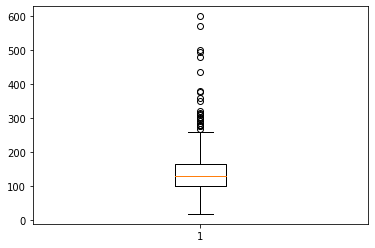

In [461]:
#Test Your Zaka
plt.boxplot(removeNA_df['LoanAmount'])

(array([ 47., 179., 114.,  31.,  16.,   5.,   2.,   2.,   2.,   2.]),
 array([ 17. ,  75.3, 133.6, 191.9, 250.2, 308.5, 366.8, 425.1, 483.4,
        541.7, 600. ]),
 <a list of 10 Patch objects>)

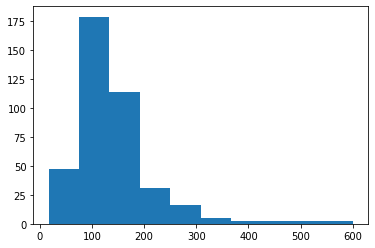

In [462]:
plt.hist(removeNA_df['LoanAmount'])

* Is there any outlier?
* Is the data skewed?

**Yes, there is a outliers, the data have +ve skewed**

Do the same for the variable 'ApplicantIncome'

{'boxes': [<matplotlib.lines.Line2D at 0x7fdd40b823d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fdd40b89450>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fdd40b92490>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fdd40b89f10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fdd40b82990>,
  <matplotlib.lines.Line2D at 0x7fdd40b82ed0>]}

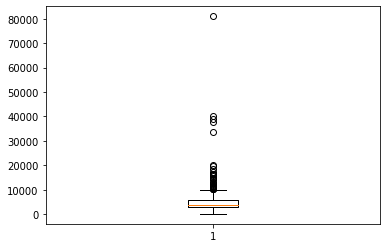

In [463]:
#Test Your Zaka
plt.boxplot(removeNA_df['ApplicantIncome'])

(array([341.,  48.,   6.,   0.,   4.,   0.,   0.,   0.,   0.,   1.]),
 array([  150.,  8235., 16320., 24405., 32490., 40575., 48660., 56745.,
        64830., 72915., 81000.]),
 <a list of 10 Patch objects>)

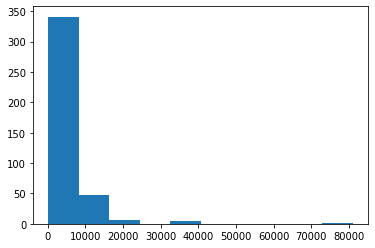

In [464]:
plt.hist(removeNA_df['ApplicantIncome'])

* Is there any outlier?
* Is the data skewed?

**Yes, there is a outliers, the data have +ve skewed**

Do the same for 'CoapplicantIncome'

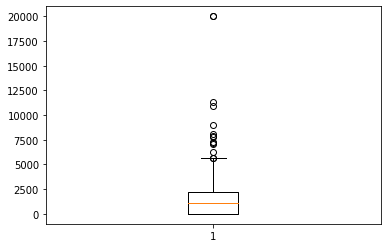

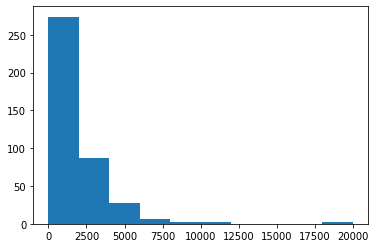

In [465]:
#Test Your Zaka
plt.boxplot(removeNA_df['CoapplicantIncome'])
plt.show()
plt.hist(removeNA_df['CoapplicantIncome'])
plt.show()

**Yes, there is a outliers, the data symetrical skewed**

Do the same for 'Loan_Amount_Term'

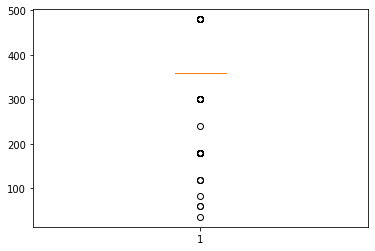

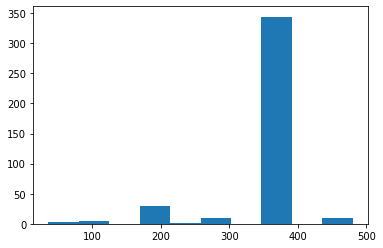

In [466]:
#Test Your Zaka
plt.boxplot(removeNA_df['Loan_Amount_Term'])
plt.show()
plt.hist(removeNA_df['Loan_Amount_Term'])
plt.show()

What do you think about outliers in this case?

**in simplw woeds, All data outliers!**

Plot the value_counts for 'Loan_Amount_term'

In [467]:
#Test Your Zaka
removeNA_df['Loan_Amount_Term'].value_counts()

360.0    344
180.0     29
480.0     10
300.0      9
120.0      3
60.0       2
240.0      1
36.0       1
84.0       1
Name: Loan_Amount_Term, dtype: int64

**Almost 344**

Do the same for the categorical variables you have ('Dependants', 'Education', etc), using a subplot of size 4 by 2

In [468]:
removeNA_df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

(array([124.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 276.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

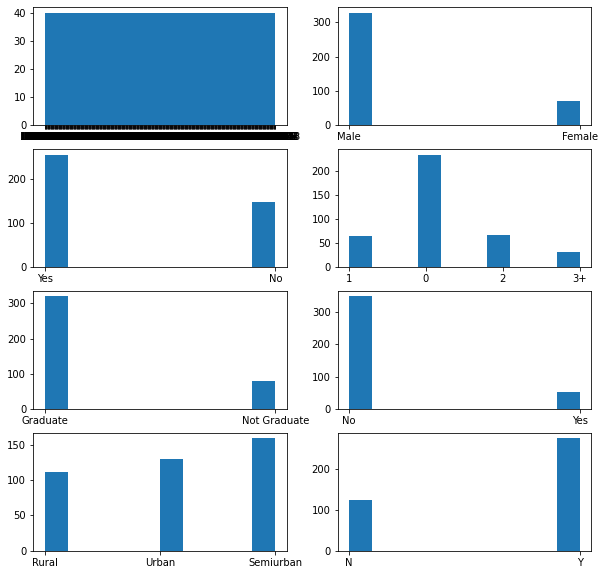

In [469]:
#Test Your Zaka
plt.figure(figsize=(10,10))
plt.subplot(421) 
plt.hist(removeNA_df['Loan_ID'])
plt.subplot(422) 
plt.hist(removeNA_df['Gender'])
plt.subplot(423) 
plt.hist(removeNA_df['Married'])
plt.subplot(424) 
plt.hist(removeNA_df['Dependents'])
plt.subplot(425) 
plt.hist(removeNA_df['Education'])
plt.subplot(426) 
plt.hist(removeNA_df['Self_Employed'])
plt.subplot(427) 
plt.hist(removeNA_df['Property_Area'])
plt.subplot(428) 
plt.hist(removeNA_df['Loan_Status'])

Perform CrossTabing between Gender and Loan_Status, and then plot the acceptance/rejection of loans for different Genders

In [470]:
#Test Your Zaka
pd.crosstab(removeNA_df['Gender'],removeNA_df['Loan_Status'], margins=True)

Loan_Status,N,Y,All
Gender,,,
Female,27,45,72
Male,97,231,328
All,124,276,400


Text(0.5, 1.0, 'Female Loan acceptance ')

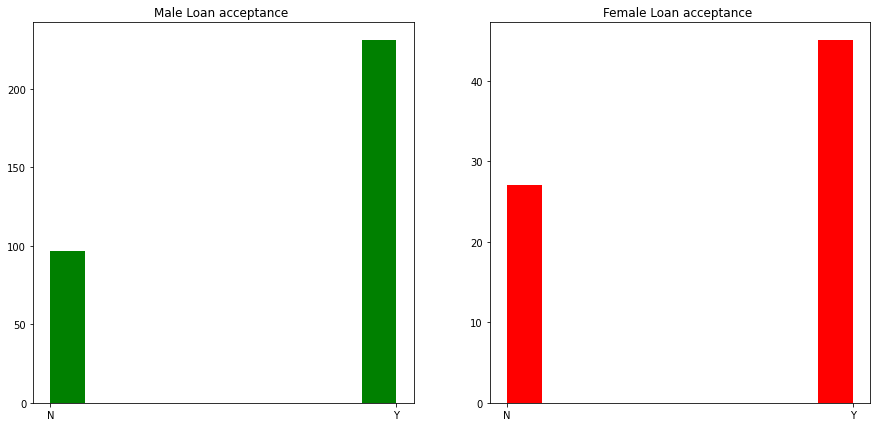

In [471]:
fem=removeNA_df[(removeNA_df['Gender']=="Female")]
mal=removeNA_df[(removeNA_df['Gender']=="Male")]

plt.figure(figsize=(15,7))
plt.subplot(121) 
plt.hist(mal["Loan_Status"], color='g')
plt.title("Male Loan acceptance ")
plt.subplot(122) 
plt.hist(fem["Loan_Status"], color='r')
plt.title("Female Loan acceptance ")

Does the Gender affect the acceptance of the Loan?

**For this question i will use the probability to find the YES for each Gender then compare them**

In [472]:
fem['Loan_Status'].value_counts()

Y    45
N    27
Name: Loan_Status, dtype: int64

In [473]:
#for female the probability for YES
45/(45+27)

0.625

In [474]:
mal['Loan_Status'].value_counts()

Y    231
N     97
Name: Loan_Status, dtype: int64

In [475]:
#for male the probability for YES
231/(231+97)

0.7042682926829268

**The gender not Effect so much Actually!**

Do the same with Credit_history and Loan_Status

Text(0.5, 1.0, 'Credit score Loan acceptance ')

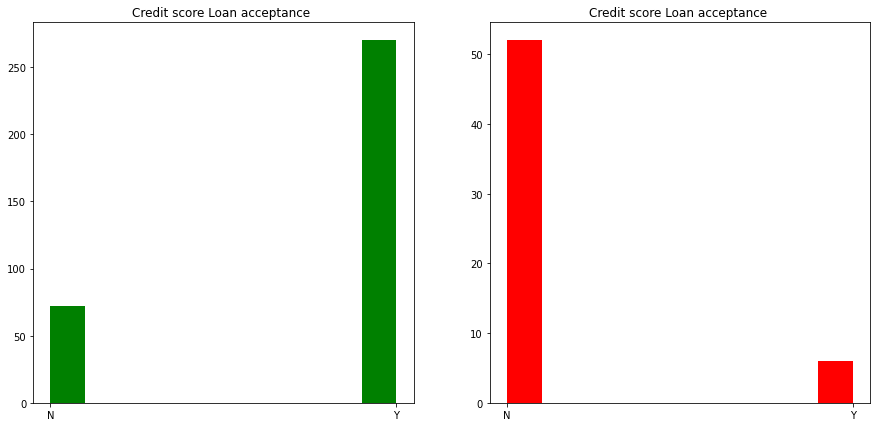

In [476]:
#Test Your Zaka
#removeNA_df.columns
removeNA_df['Credit_History'].value_counts()

CDY=removeNA_df[(removeNA_df['Credit_History']==1)]
CDN=removeNA_df[(removeNA_df['Credit_History']==0)]

plt.figure(figsize=(15,7))
plt.subplot(121) 
plt.hist(CDY["Loan_Status"], color='g')
plt.title("Credit score Loan acceptance ")
plt.subplot(122) 
plt.hist(CDN["Loan_Status"], color='r')
plt.title("Credit score Loan acceptance ")

Does the Credit History affect the acceptance of the Loan?

**YES!**

Do the same with Dependents and Loan_Status

Text(0.5, 1.0, '3 and more other dependants Loan acceptance ')

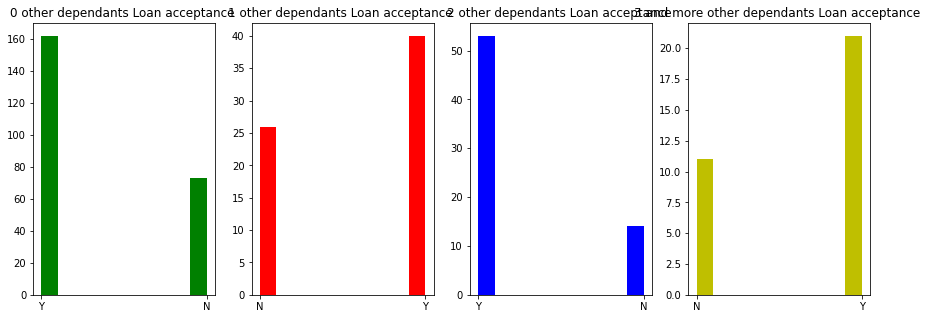

In [477]:
#Test Your Zaka
removeNA_df['Dependents'].value_counts()

D0=removeNA_df[(removeNA_df['Dependents']=='0')]
D1=removeNA_df[(removeNA_df['Dependents']=='1')]
D2=removeNA_df[(removeNA_df['Dependents']=='2')]
D3=removeNA_df[(removeNA_df['Dependents']=='3+')]

plt.figure(figsize=(15,5))
plt.subplot(141) 
plt.hist(D0["Loan_Status"], color='g')
plt.title("0 other dependants Loan acceptance ")

plt.subplot(142) 
plt.hist(D1["Loan_Status"], color='r')
plt.title("1 other dependants Loan acceptance ")

plt.subplot(143) 
plt.hist(D2["Loan_Status"], color='b')
plt.title("2 other dependants Loan acceptance ")

plt.subplot(144) 
plt.hist(D3["Loan_Status"], color='y')
plt.title("3 and more other dependants Loan acceptance ")

Does the number of dependents affect the acceptance of the Loan?

**Maybe but it will have a weak corerelation with the Loan_statues**

Do the same between Education and Loan_Status

Text(0.5, 1.0, 'not Graduate score Loan acceptance ')

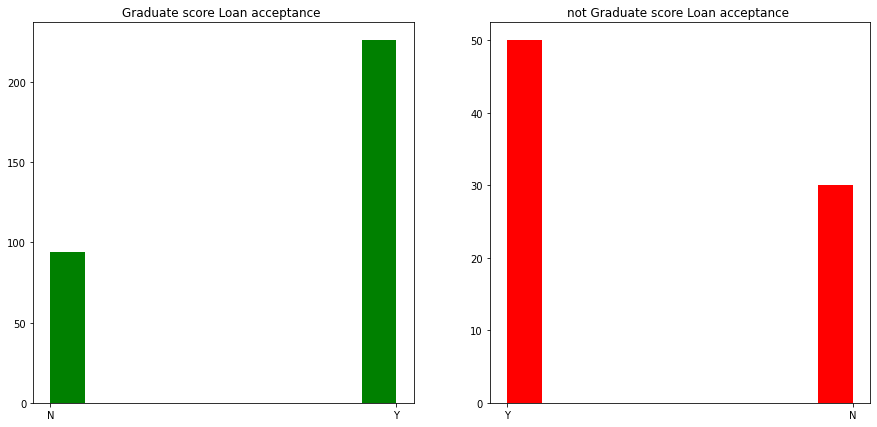

In [478]:
#Test Your Zaka
removeNA_df['Education'].value_counts()

Grd=removeNA_df[(removeNA_df['Education']=='Graduate')]
NGrd=removeNA_df[(removeNA_df['Education']=='Not Graduate')]

plt.figure(figsize=(15,7))
plt.subplot(121) 
plt.hist(Grd["Loan_Status"], color='g')
plt.title("Graduate score Loan acceptance ")
plt.subplot(122) 
plt.hist(NGrd["Loan_Status"], color='r')
plt.title("not Graduate score Loan acceptance ")

Does the level of education affect the acceptance of the Loan?

**Yes! the number of accepetance for Graduate more**

Do the same between Married and Loan_Status

Text(0.5, 1.0, 'Not Married score Loan acceptance ')

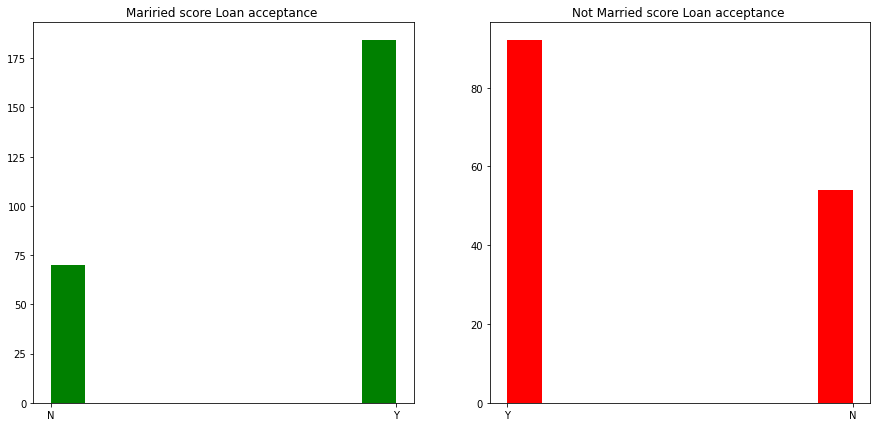

In [479]:
#Test Your Zaka
removeNA_df['Married'].value_counts()

MY=removeNA_df[(removeNA_df['Married']=='Yes')]
MN=removeNA_df[(removeNA_df['Married']=='No')]

plt.figure(figsize=(15,7))
plt.subplot(121) 
plt.hist(MY["Loan_Status"], color='g')
plt.title("Mariried score Loan acceptance ")
plt.subplot(122) 
plt.hist(MN["Loan_Status"], color='r')
plt.title("Not Married score Loan acceptance ")

Does the marriage affect the acceptance of the Loan?

**Not Really**

Do the same between Property_Area and Loan_Status

Text(0.5, 1.0, 'Rural Loan acceptance ')

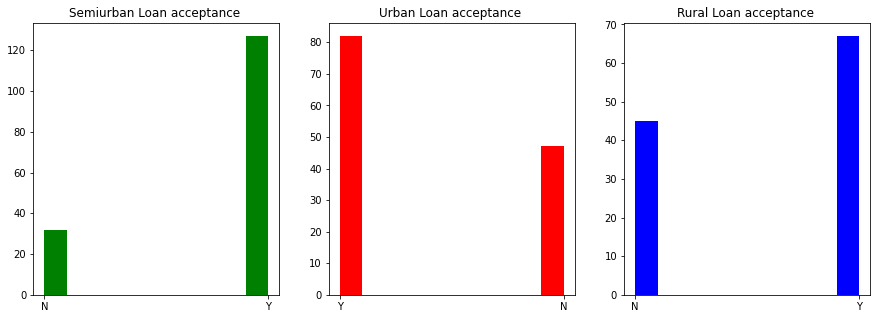

In [480]:
#Test Your Zaka
removeNA_df['Property_Area'].value_counts()

PAS=removeNA_df[(removeNA_df['Property_Area']=='Semiurban')]
PAU=removeNA_df[(removeNA_df['Property_Area']=='Urban')]
PAR=removeNA_df[(removeNA_df['Property_Area']=='Rural')]

plt.figure(figsize=(15,5))
plt.subplot(131) 
plt.hist(PAS["Loan_Status"], color='g')
plt.title("Semiurban Loan acceptance ")

plt.subplot(132) 
plt.hist(PAU["Loan_Status"], color='r')
plt.title("Urban Loan acceptance ")

plt.subplot(133) 
plt.hist(PAR["Loan_Status"], color='b')
plt.title("Rural Loan acceptance ")


Does the Property Area affect the acceptance of the Loan?

**Yes, this appear clear for Rural, there a lot of no, and for semirban a lot of yes!**

Do the same between Self_Employed and Loan_Status

Text(0.5, 1.0, 'No, Self_Employed ')

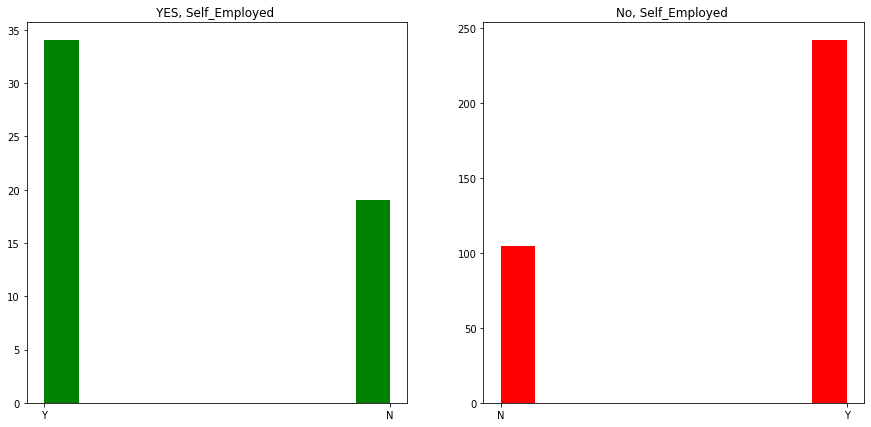

In [481]:
#Test Your Zaka
removeNA_df['Self_Employed'].value_counts()

SEY=removeNA_df[(removeNA_df['Self_Employed']=='Yes')]
SEN=removeNA_df[(removeNA_df['Self_Employed']=='No')]

plt.figure(figsize=(15,7))
plt.subplot(121) 
plt.hist(SEY["Loan_Status"], color='g')
plt.title("YES, Self_Employed ")
plt.subplot(122) 
plt.hist(SEN["Loan_Status"], color='r')
plt.title("No, Self_Employed ")

Does the Self Employed Property affect the acceptance of the Loan?

**from previous, not really effect, but the not self employed more requierd for the loans!**

Plot a Scatter Plot between Loan_Status and: 
* ApplicantIncome
* CoapplicantIncome
* LoanAmount
* LoanAmount_Term

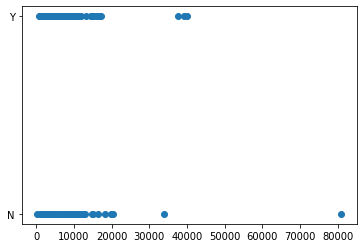

In [482]:
plt.scatter(removeNA_df['ApplicantIncome'],removeNA_df['Loan_Status'])

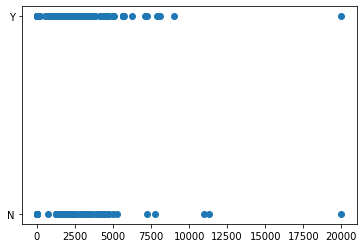

In [483]:
#Test Your Zaka
plt.scatter(removeNA_df['CoapplicantIncome'],removeNA_df['Loan_Status'])

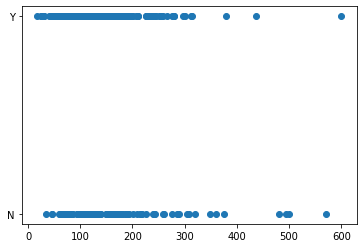

In [484]:
#Test Your Zaka
plt.scatter(removeNA_df['LoanAmount'],removeNA_df['Loan_Status'])

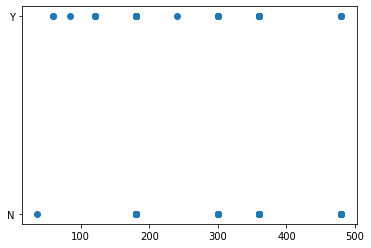

In [485]:
#Test Your Zaka
plt.scatter(removeNA_df['Loan_Amount_Term'],removeNA_df['Loan_Status'])

Do you think these scatter plots gave you valuable information about the Loan_Status?

**NO!**

Group your dataframe by Loan_Status on the median Value

In [486]:
#Test Your Zaka
removeNA_df.groupby("Loan_Status").median()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_Status,,,,,
N,3974.0,0.0,128.0,360.0,1.0
Y,3854.0,1221.0,126.0,360.0,1.0


What did you deduce?

**CoapplicantIncome is the most important to detect the loanacceptance**

# 4. Preprocessing
"Garbage in, garbage out".
<br>
<br>
Data should be preprocessed and cleaned to get rid of noisy data. Preprocessing includes:

- remove unsued column(s)
- remove grabage data
- convert continous data into categorical
- treat missing data
- encode categorical data
- normalization: standarize data ranges for all features (e.g., between 0 and 1)

## Remove unused columns

Remove the features that do not contribute to the prediction of the loan status

In [487]:
#Test Your Zaka
#from the previoues results: Gender, Dependants, Marrige and self employment not really effect, 
#so, we can remove the un sense featuers, i will drop Load_ID only at this time, 
#and I can repeat this step depending on the Featuer importance
#Also and this clear, the Load_ID does not matter
df.drop('Loan_ID',axis=1,inplace=True) 


In [488]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Remove grabage data

If you go back to one of the EDA steps where you saw the unique values of Dependents, you can see that you have '3+' as a value. In order to make the algorithm learn from such information, you have to replace this with a number. We will replace it by 3.

In [489]:
#Test Your Zaka
#df.info()
df['Dependents'].replace(['3+'],['3'],inplace=True)
df['Dependents'].value_counts()

0    295
1     84
2     82
3     40
Name: Dependents, dtype: int64

##Convert continuous data into categorical

Search for the feature that is contionuous but should be categorical and convert it

In [490]:
#df.columns
df["Credit_History"] = df["Credit_History"].astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513 entries, 0 to 512
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Gender             503 non-null    object  
 1   Married            510 non-null    object  
 2   Dependents         501 non-null    object  
 3   Education          513 non-null    object  
 4   Self_Employed      486 non-null    object  
 5   ApplicantIncome    513 non-null    int64   
 6   CoapplicantIncome  513 non-null    float64 
 7   LoanAmount         495 non-null    float64 
 8   Loan_Amount_Term   499 non-null    float64 
 9   Credit_History     470 non-null    category
 10  Property_Area      513 non-null    object  
 11  Loan_Status        513 non-null    object  
dtypes: category(1), float64(3), int64(1), object(7)
memory usage: 44.8+ KB


## Treat missing data
- fill missing categorical data & discrete data with mode
- fill missing continuous data with mean


In [491]:
#Test Your Zaka
#at the first convert all object to categorical
df["Gender"] = df["Gender"].astype("category")
df["Married"] = df["Married"].astype("category")
df["Dependents"] = df["Dependents"].astype("category")
df["Education"] = df["Education"].astype("category")
df["Self_Employed"] = df["Self_Employed"].astype("category")
df["Property_Area"] = df["Property_Area"].astype("category")


**the miising data in: Gender miss 10, Married miss 3, Dependents miss 12, Self_Employed miss 27, LoanAmount miss 18, Loan_Amount_Term miss 14, Credit_History miss 43**

In [492]:
#fill missing categorical data & discrete data with mode
df.Gender.fillna(df.Gender.mode()[0],inplace=True)
df.Married.fillna(df.Married.mode()[0],inplace=True)
df.Dependents.fillna(df.Dependents.mode()[0],inplace=True)
df.Self_Employed.fillna(df.Self_Employed.mode()[0],inplace=True)
df.Credit_History.fillna(df.Credit_History.mode()[0],inplace=True)


In [493]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [494]:
#fill missing continuous data with mean
df.LoanAmount.fillna(df.LoanAmount.mean(),inplace=True)
df.Loan_Amount_Term.fillna(df.Loan_Amount_Term.mean(),inplace=True)

## Check if any null value exist

In [495]:
#Test Your Zaka
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513 entries, 0 to 512
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Gender             513 non-null    category
 1   Married            513 non-null    category
 2   Dependents         513 non-null    category
 3   Education          513 non-null    category
 4   Self_Employed      513 non-null    category
 5   ApplicantIncome    513 non-null    int64   
 6   CoapplicantIncome  513 non-null    float64 
 7   LoanAmount         513 non-null    float64 
 8   Loan_Amount_Term   513 non-null    float64 
 9   Credit_History     513 non-null    category
 10  Property_Area      513 non-null    category
 11  Loan_Status        513 non-null    object  
dtypes: category(7), float64(3), int64(1), object(1)
memory usage: 24.6+ KB


## Encode categorical data

Go over your categorical features and encode them (change their values to be numerical to be able to feed them to an algorithm and get a model in the end)

In [505]:
#Test Your Zaka
#df.info()
#Encode the categorical data which: Gender , Married , Dependents , Education , Self_Employed, Credit_History , Property_Area , Loan_Status
le=LabelEncoder()
df.Gender=le.fit_transform(df.Gender)
df.Married=le.fit_transform(df.Married)
df.Dependents=le.fit_transform(df.Dependents)
df.Education=le.fit_transform(df.Education)
df.Self_Employed=le.fit_transform(df.Self_Employed)
df.Credit_History=le.fit_transform(df.Credit_History)
df.Property_Area=le.fit_transform(df.Property_Area)
df.Loan_Status=le.fit_transform(df.Loan_Status)

df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,144.739394,360.0,1,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1,2,1


## Normalization

Normalize data ranges for all features (e.g., between 0 and 1)
First compute the maximum of each feature, and then divide each column by its maximum. After it, describe the data

In [506]:
#Test Your Zaka
mx=df.max()
df=df.divide(mx) 

# 6. Training & Validating

Create a variable x for the inputs (Fetaures), and a variable y for the output ('Loan_Status')
Then, split the data between training (70%) and testing (30%).

In [585]:
#Test Your Zaka
x = df.iloc[:,0:-1].values
y =df.iloc[:,-1].values 

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

##Creating & Fitting the model

Create a Logistic Regression Model, and fit it on the training data you have

In [586]:
#Test Your Zaka
model = LogisticRegression()
model.fit(x_train,y_train)
print('Model trained!')

Model trained!


##Validating the model

Validate your model on the testing data, and compute the accuracy score of your predictions

In [587]:
#Test Your Zaka
print('Model score {}'.format(model.score(x_test,y_test)))

Model score 0.7857142857142857


#7. Feature Importance

Evaluate the feature importance in your resulting model, and plot it

['Gender' 'Married' 'Dependents' 'Education' 'Self_Employed'
 'ApplicantIncome' 'CoapplicantIncome' 'LoanAmount' 'Loan_Amount_Term'
 'Credit_History' 'Property_Area']

[-0.42333874  0.39012729  0.20773628 -0.33611943 -0.04353165 -0.14714813
  0.41916829 -0.79993131 -0.39001383  3.14792856  0.01647172]


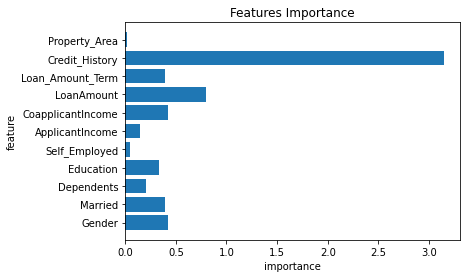

In [601]:
#Test Your Zaka
columns_names = df.columns[0:-1].values
features_importance = model.coef_[0]

print(columns_names)
print()
print(features_importance)
plt.barh(columns_names,abs(features_importance))
plt.title('Features Importance')
plt.xlabel('importance')
plt.ylabel('feature')
plt.show()



What's the most important feature?

**The credit Score, also,we can remove Property Area from the model**